<h1 style="color:blue">Simulation Project Part 1</h1>
<h1>Mohammad Saeed Zare Mehrjardi - 99243037</h1>
<h1>Zahra Sadat Esmati Baygi - 99243053 </h1>

In [2]:
!pip install networkx
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install pandas

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import math
import random
from scipy.stats import norm
import scipy
import sys
import pandas as pd
import graph as gr
import seaborn as sns
from collections import Counter

In [4]:
sys.setrecursionlimit(10000)

# we want to model some graphs
* Stationary model
* Monte-Carlo : to calculate the available parameters in some types of graphs (simulate 100 to 1000 times for accept or reject a soluiton)
* It is not dependent on time

# Create ER Sample graph

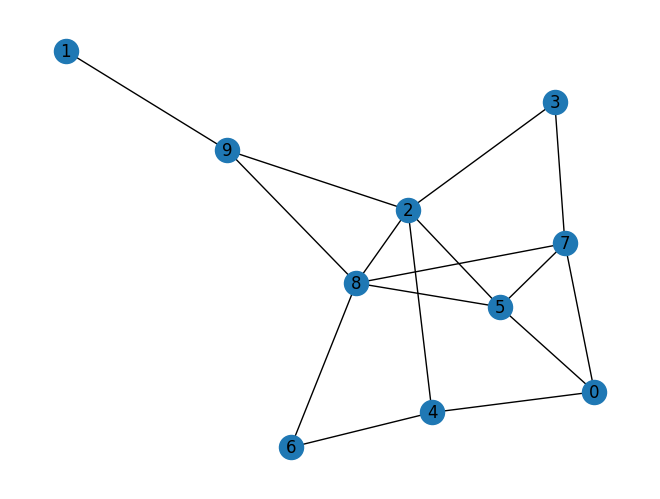

In [5]:
# create er graph (also known as an Erdős-Rényi graph or a binomial graph)
n = 10  # Number of nodes
p = 0.5   # Probability of an edge between any two nodes

er_graph = nx.gnp_random_graph(n, p)

nx.draw(er_graph, with_labels=True)
plt.show()

In [6]:
er_degree_df = pd.DataFrame({"node":er_graph.nodes(),"degree_of_node":list(d for n, d in er_graph.degree())})
er_degree_df

,node,degree_of_node
0,0,3
1,1,1
2,2,5
3,3,2
4,4,3
5,5,4
6,6,2
7,7,4
8,8,5
9,9,3


mean 3.85


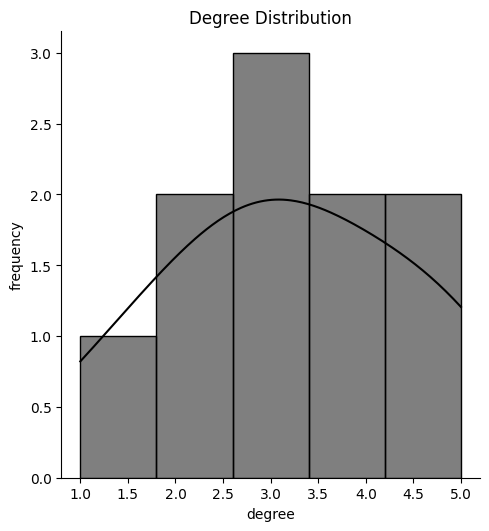

In [7]:
gr.draw_degree_distribution(er_graph)
print(f"mean {np.average(er_graph.degree)}")

In [8]:
# create ER graphs dataset with size 100 and p = 0.5
number_of_simulation = 1000
n = 100
p = 0.5
er_graphs = [nx.gnp_random_graph(n, p) for _ in range(number_of_simulation)]

er_degrees = []
for er in er_graphs:
    er_degrees += [d for n, d in er.degree()]

Text(0.5, 1.0, 'Degree Distribution')

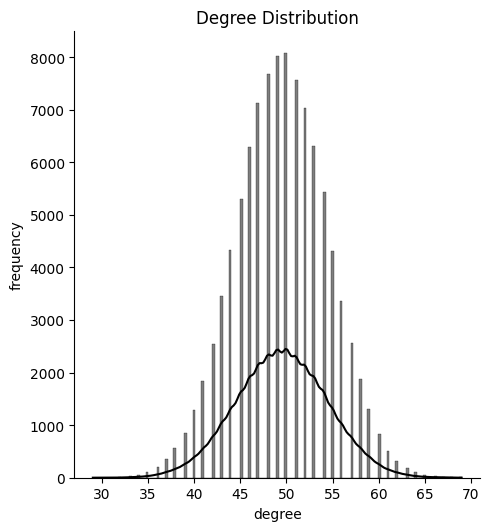

In [9]:
sns.displot(er_degrees, kde=True, color="black")

plt.xlabel("degree")
plt.ylabel("frequency")
plt.title(f"Degree Distribution")

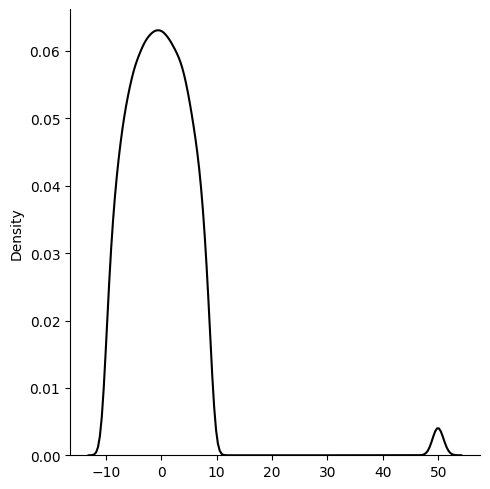

In [10]:
eigen = []
for er in er_graphs:

    eigen += gr.complex_abs(gr.adjacency_eigen_values(er))
    
sns.displot(eigen, kind="kde", color="black")

Text(0.5, 1.0, 'Degree Distribution')

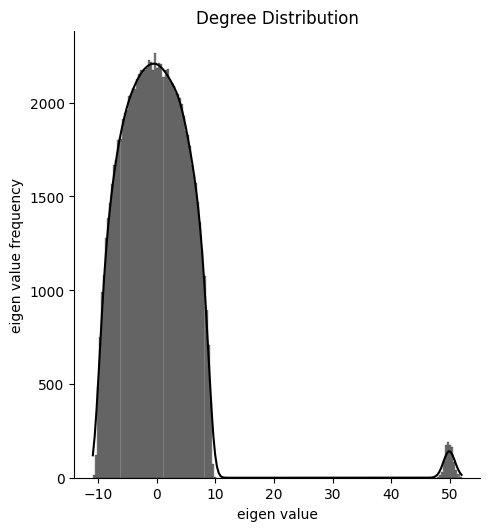

In [11]:
sns.displot(eigen, kde=True, color="black")

plt.xlabel("eigen value")
plt.ylabel("eigen value frequency")
plt.title(f"Degree Distribution")

## Degree Statistics (With Box Plot)

**note:** *An outlier is a value that lies in both extremes of data. In other words, it's a value that lies outside the overall distribution pattern and thus can affect the overall data series. These anomalies are treated as abnormal values that can distort the final insights.*

mean is 49.48824
standard deviation is 4.946083471030387
CI is (49.45758385703909, 49.518896142960905)


(49.48824,
 4.946083471030387,
 0.030656142960904235,
 (49.45758385703909, 49.518896142960905))

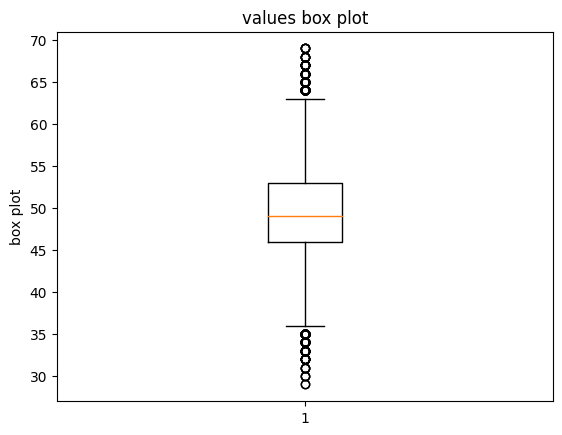

In [12]:
gr.calculate_statistics_parameters(er_degrees)

# Create SF Sample graph

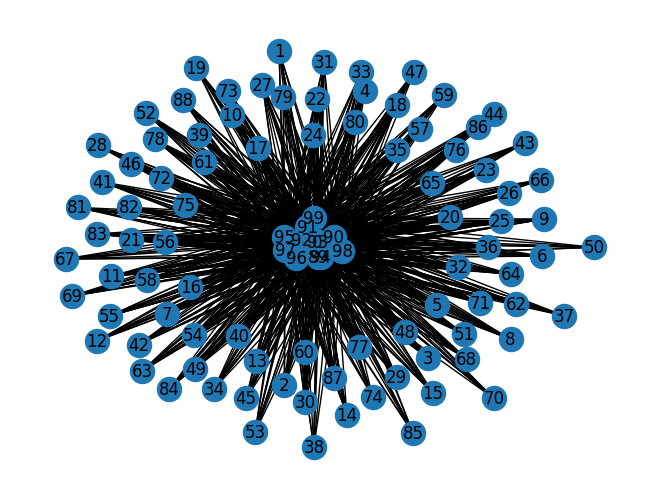

In [13]:
n = 100
m = 88
sf_graphs = []

sf_graph = nx.barabasi_albert_graph(n, m)

nx.draw(sf_graph, with_labels=True)
plt.show()

In [14]:
sf_degree_df = pd.DataFrame({"node":sf_graph.nodes(),"degree_of_node":list(d for n, d in sf_graph.degree())})
sf_degree_df

,node,degree_of_node
0,0,99
1,1,10
2,2,11
3,3,11
4,4,11
...,...,...
95,95,92
96,96,91
97,97,90
98,98,89


mean 35.31


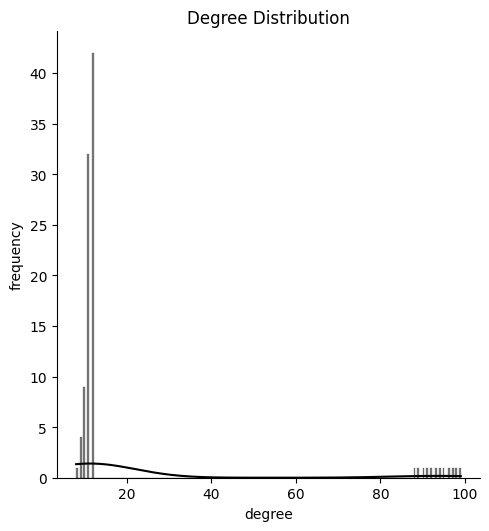

In [15]:
gr.draw_degree_distribution(sf_graph)
print(f"mean {np.average(sf_graph.degree)}")

(8.0, 60.0)

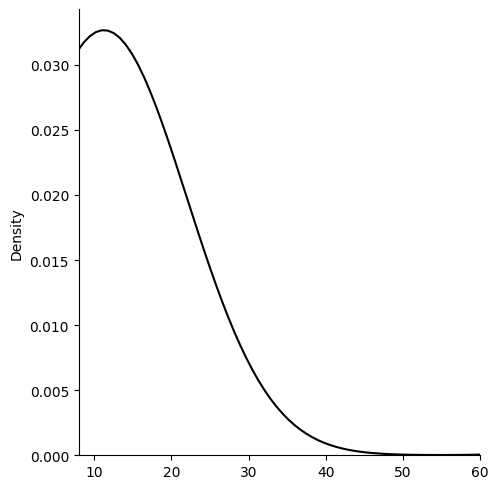

In [16]:
# power low distribtion
degrees = [d for n, d in sf_graph.degree()]
sns.displot(degrees, kind="kde", color="black")
plt.xlim(min(degrees), 60)

In [17]:
# create SF graphs dataset with size 100 and m = 3
number_of_simulation = 1000
n = 100
m = 3
sf_graphs = [nx.barabasi_albert_graph(n, m) for _ in range(number_of_simulation)]

sf_degrees = []
for sf in sf_graphs:
    sf_degrees += [d for n, d in sf.degree()]

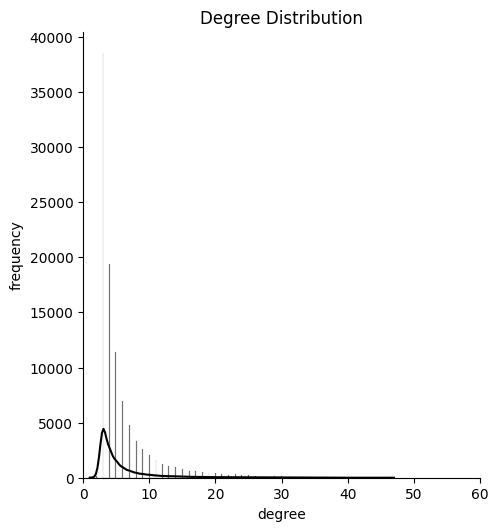

In [18]:
sns.displot(sf_degrees, kde=True, color="black")

plt.xlabel("degree")
plt.ylabel("frequency")
plt.title(f"Degree Distribution")

plt.xlim(0, 60)
plt.show()

In [19]:
# create SF graphs dataset with size 100 and m = 3
number_of_simulation = 1000
n = 100
m = 3
sf_graphs = [nx.line_graph(nx.barabasi_albert_graph(n, m)) for _ in range(number_of_simulation)]

sf_degrees = []
for sf in sf_graphs:
    sf_degrees += [d for n, d in sf.degree()]

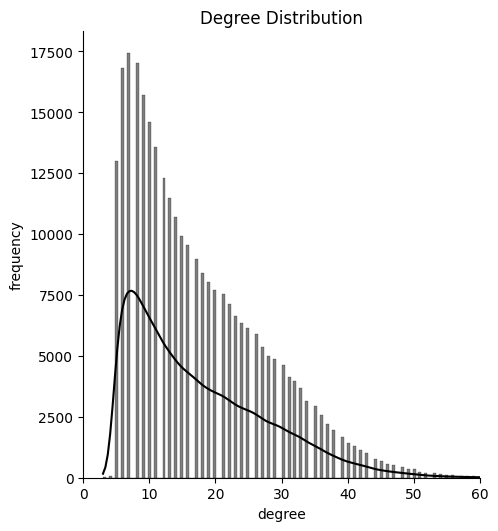

In [20]:
sns.displot(sf_degrees, kde=True, color="black")

plt.xlabel("degree")
plt.ylabel("frequency")
plt.title(f"Degree Distribution")

plt.xlim(0, 60)
plt.show()

(0.0, 60.0)

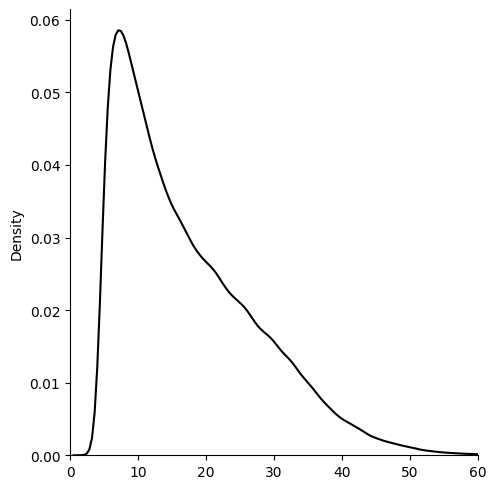

In [21]:
# power low distribtion
sns.displot(sf_degrees, kind="kde", color="black")
plt.xlim(0, 60)

## SF Box Plot

mean is 17.383821305841924
standard deviation is 10.212373101620106
CI is (17.346715979982726, 17.42092663170112)


(17.383821305841924,
 10.212373101620106,
 0.03710532585919643,
 (17.346715979982726, 17.42092663170112))

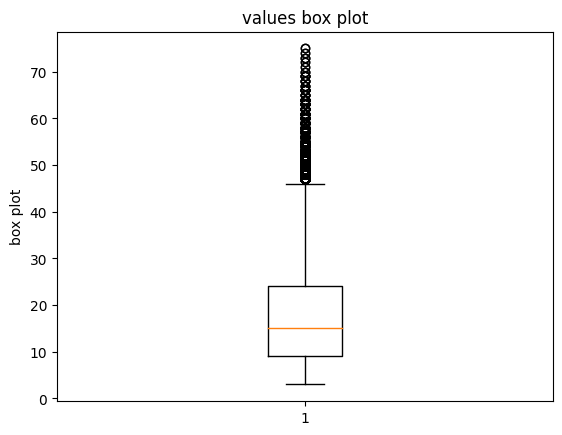

In [22]:
gr.calculate_statistics_parameters(sf_degrees)

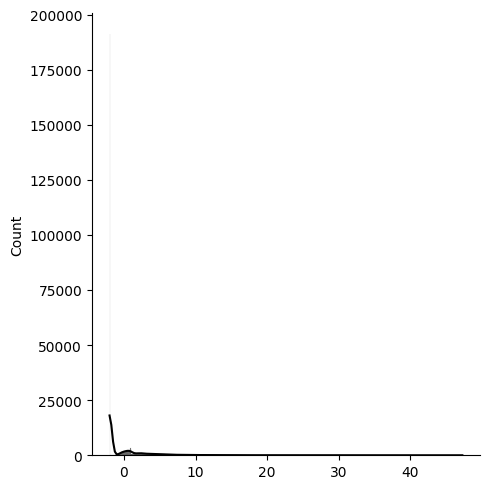

In [23]:
eigen = []
for sf in sf_graphs:

    eigen += gr.complex_abs(gr.adjacency_eigen_values(sf))
    
sns.displot(eigen, kde=True, color="black")

# Create Watts strogatz Sample Graph

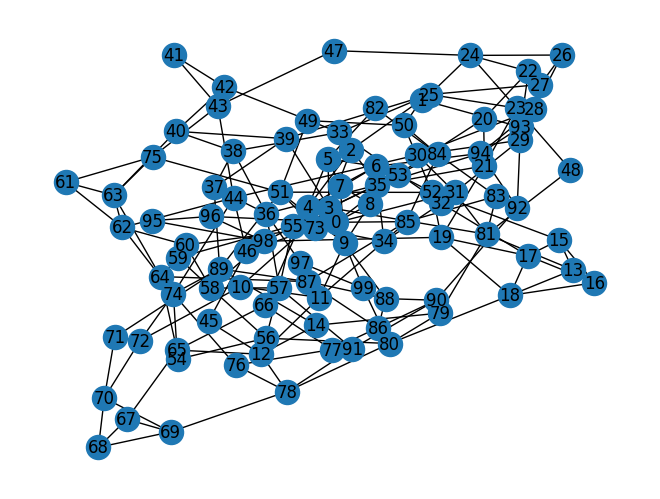

In [24]:
n = 100
k = 5
p = 0.5

wa_graph = nx.watts_strogatz_graph(n, k, p)

nx.draw(wa_graph, with_labels=True)
plt.show()

mean 26.75


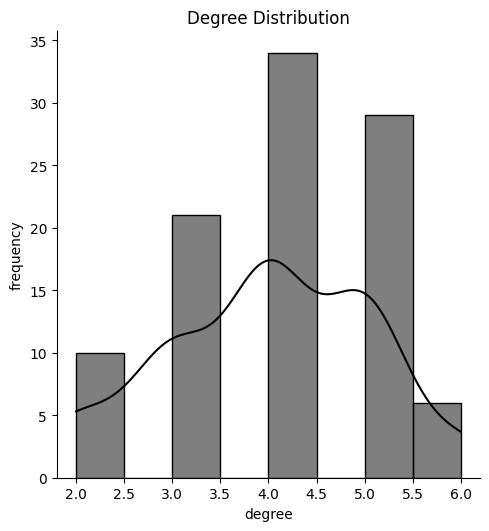

In [25]:
gr.draw_degree_distribution(wa_graph)
print(f"mean {np.average(wa_graph.degree)}")

(2.0, 60.0)

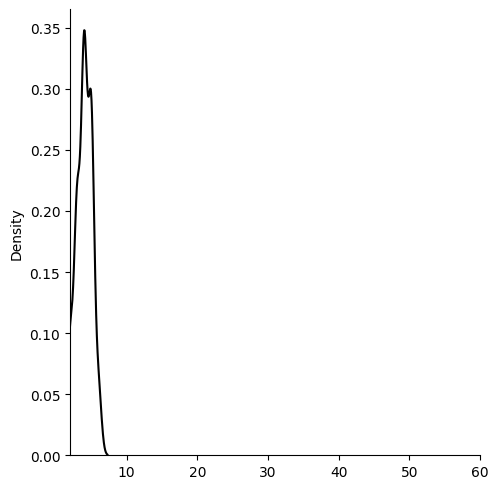

In [26]:
degrees = [d for n, d in wa_graph.degree()]
sns.displot(degrees, kind="kde", color="black")
plt.xlim(min(degrees), 60)

In [27]:
wa_degree_df = pd.DataFrame({"node":wa_graph.nodes(),"degree_of_node":list(d for n, d in wa_graph.degree())})
wa_degree_df

,node,degree_of_node
0,0,5
1,1,3
2,2,3
3,3,6
4,4,4
...,...,...
95,95,2
96,96,3
97,97,2
98,98,4


In [28]:
# create SF graphs dataset with size 100 and m = 3
number_of_simulation = 1000
n = 100
k = 40
p = 0.5

wa_graphs = [nx.watts_strogatz_graph(n, k, p) for _ in range(number_of_simulation)]

wa_degrees = []
for wa in wa_graphs:
    wa_degrees += [d for n, d in wa.degree()]

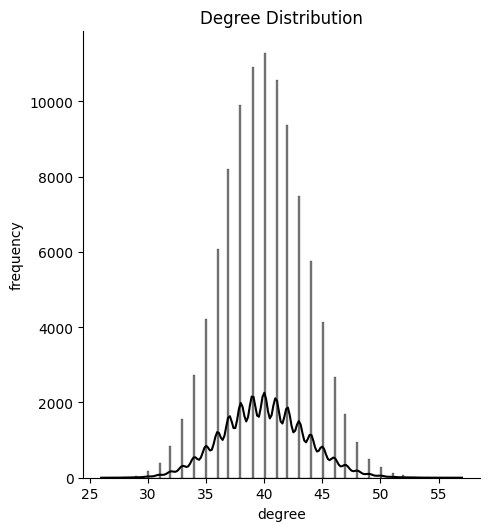

In [29]:
sns.displot(wa_degrees, kde=True, color="black")

plt.xlabel("degree")
plt.ylabel("frequency")
plt.title(f"Degree Distribution")

plt.show()

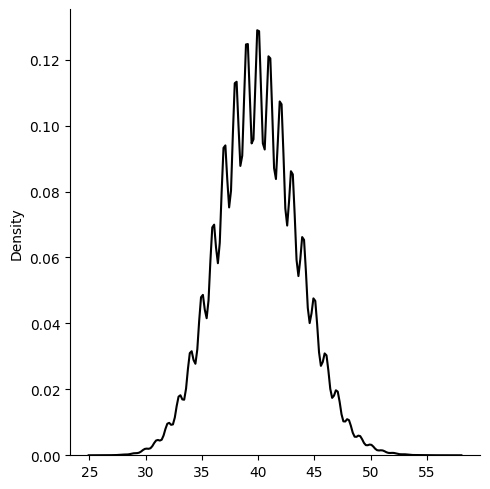

In [30]:
sns.displot(wa_degrees, kind="kde", color="black")

## WA Box Plot

mean is 40.0
standard deviation is 3.5553115194030465
CI is (39.977963950902215, 40.022036049097785)


(40.0,
 3.5553115194030465,
 0.0220360490977852,
 (39.977963950902215, 40.022036049097785))

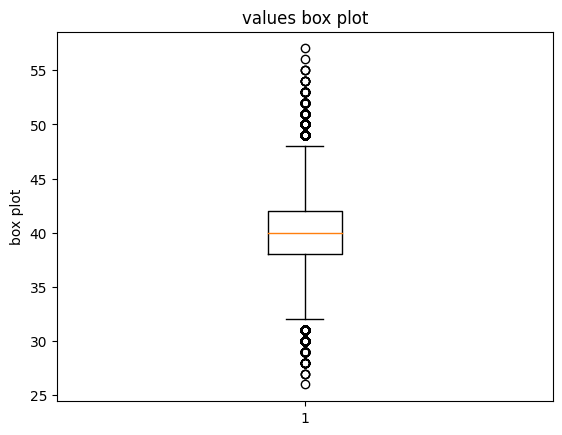

In [31]:
gr.calculate_statistics_parameters(wa_degrees)

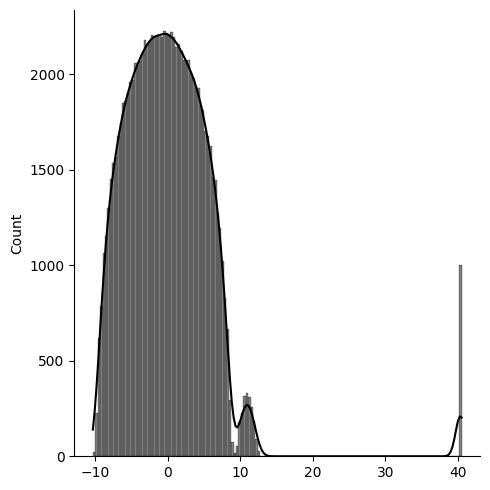

In [32]:
eigen = []
for wa in wa_graphs:

    eigen += gr.complex_abs(gr.adjacency_eigen_values(wa))
    
sns.displot(eigen, kde=True, color="black")

# Create Dataset For ER, SF, WA Graphs

In [33]:
# crate 100 ER graph with size between 100 to 1000
number_of_simulation = 100
p = 0.15
er_degree_mean = 0
er_graphs = [] # ER graph dataset
for i in range(number_of_simulation):
    n = random.randint(100, 1000)
    er = nx.gnp_random_graph(n, p)
    
    er_degree_mean += sum(list(d for n, d in er.degree())) / n  
    er_graphs.append(er)
    
er_degree_mean /= number_of_simulation    

In [34]:
# crate 100 SF graph with size between 100 to 1000
number_of_simulation = 100
m = 50
sf_graphs = [] # sr graph dataset
sf_degree_mean = 0
for i in range(number_of_simulation):
    n = random.randint(100, 1000)
    sf = nx.barabasi_albert_graph(n, m)
    
    sf_degree_mean += sum(list(d for n, d in sf.degree())) / n  
    sf_graphs.append(sf)
    
sf_degree_mean /= number_of_simulation    

In [35]:
# crate 100 watts strogatz graph with size between 100 to 1000
number_of_simulation = 100
k = 85
p = 0.5
wa_graphs = [] # watts strogatz graph dataset
wa_degree_mean = 0
for i in range(number_of_simulation):
    n = random.randint(100, 1000)
    wa = nx.watts_strogatz_graph(n, k, p)
    
    wa_degree_mean += sum(list(d for n, d in wa.degree())) / n  
    wa_graphs.append(wa)
    
wa_degree_mean /= number_of_simulation    

In [36]:
df = pd.DataFrame({"degree":[er_degree_mean, sf_degree_mean, wa_degree_mean]}, index=['ER', 'SF', 'WA'])
df

,degree
ER,83.138138
SF,89.148765
WA,84.000000


# compare ER, SF, Watts-Strogatz Algebratic Connectivity
### ER > SF > Watts-Strogatz

In [37]:
number_of_simulation = 10
sf_algebraic_connectivity = []
er_algebraic_connectivity = []
wa_algebraic_connectivity = []

for i in range(number_of_simulation):
    sf_algebraic_connectivity.append(gr.algebraic_connectivity(sf_graphs[i]))
    er_algebraic_connectivity.append(gr.algebraic_connectivity(er_graphs[i]))
    wa_algebraic_connectivity.append(gr.algebraic_connectivity(wa_graphs[i]))

print(f"er algebratic connectivity {np.mean(er_algebraic_connectivity)}")
print(f"sf algebratic connectivity {np.mean(sf_algebraic_connectivity)}")
print(f"watts strogatz algebratic connectivity {np.mean(wa_algebraic_connectivity)}")


er algebratic connectivity 57.36573636861001
sf algebratic connectivity 43.35150133743
watts strogatz algebratic connectivity 50.26744804101


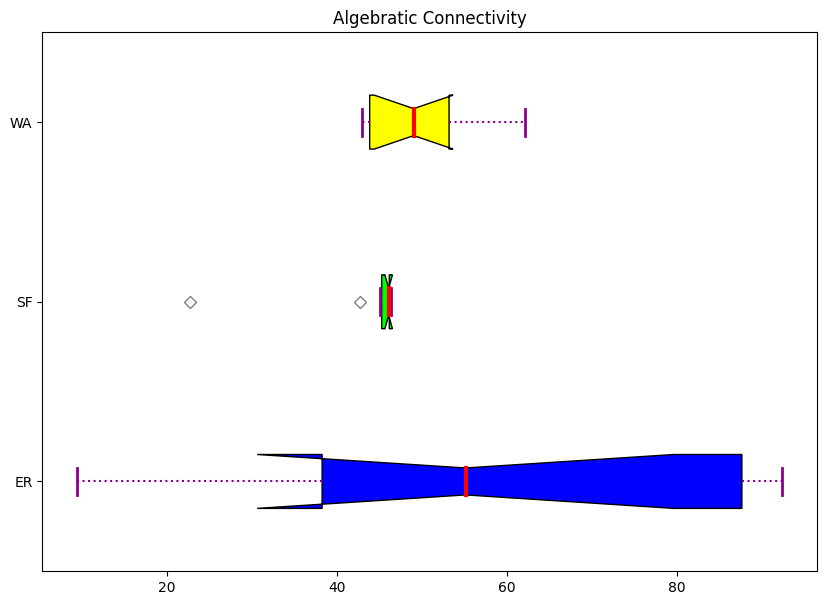

In [38]:
gr.box_plot([er_algebraic_connectivity, sf_algebraic_connectivity, wa_algebraic_connectivity], ['ER', 'SF', 'WA'], 'Algebratic Connectivity')

# compare ER, SF, Watts-Strogatz Spectral Gap

### ER > SF > Watts-Strogatz

In [39]:
number_of_simulation = 10
sf_spectral_gap = []
er_spectral_gap = []
wa_spectral_gap = []

for i in range(number_of_simulation):
    sf_spectral_gap.append(gr.spectral_gap(sf_graphs[i]))
    er_spectral_gap.append(gr.spectral_gap(er_graphs[i]))
    wa_spectral_gap.append(gr.spectral_gap(wa_graphs[i]))

print(f"er spectral gap {np.mean(er_spectral_gap)}")
print(f"sf spectral gap {np.mean(sf_spectral_gap)}")
print(f"watts strogatz spectral gap {np.mean(wa_spectral_gap)}")

er spectral gap 68.777730731
sf spectral gap 96.82776585046
watts strogatz spectral gap 51.25630968388


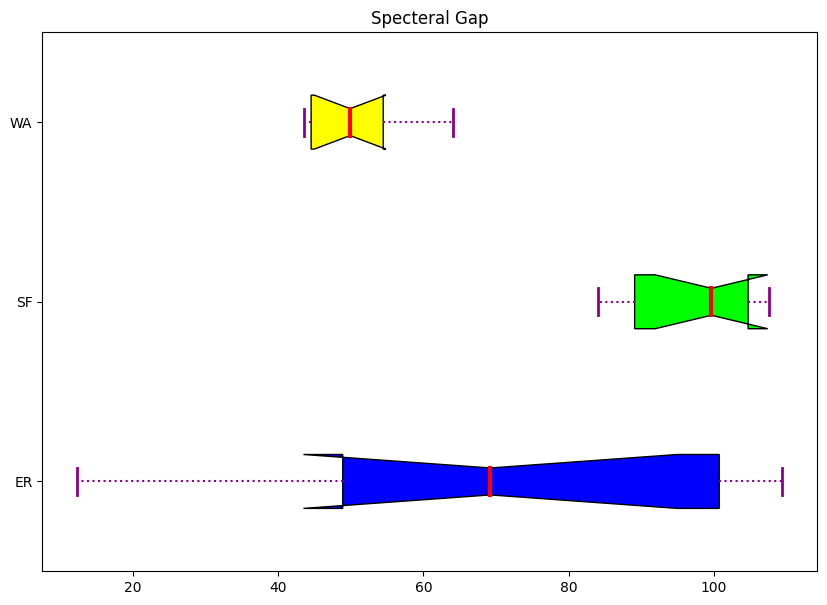

In [40]:
gr.box_plot([er_spectral_gap, sf_spectral_gap, wa_spectral_gap], ['ER', 'SF', 'WA'], 'Specteral Gap')

# compare ER, SF, Watts-Strogatz Natural Connectivity

ER > SF > Watts-Strogatz

In [41]:
number_of_simulation = 10
sf_natural_connectivity = []
er_natural_connectivity = []
wa_natural_connectivity = []

for i in range(number_of_simulation):
    sf_natural_connectivity.append(gr.natural_connectivity(sf_graphs[i]))
    er_natural_connectivity.append(gr.natural_connectivity(er_graphs[i]))
    wa_natural_connectivity.append(gr.natural_connectivity(wa_graphs[i]))

print(f"er natural connectivity {np.mean(er_natural_connectivity)}")
print(f"sf natural connectivity {np.mean(sf_natural_connectivity)}")
print(f"watts strogatz natural connectivity {np.mean(wa_natural_connectivity)}")

er natural connectivity 78.72580962962
sf natural connectivity 107.38772403226999
watts strogatz natural connectivity 78.21330351897


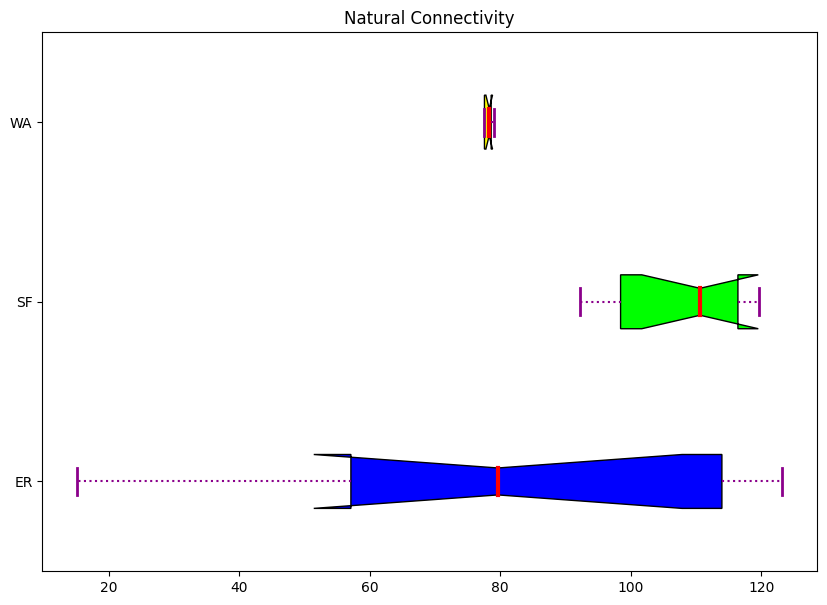

In [42]:
gr.box_plot([er_natural_connectivity, sf_natural_connectivity, wa_natural_connectivity], ['ER', 'SF', 'WA'], 'Natural Connectivity')

# compare ER, SF, Watts-Strogatz Energy Connectivity

In [43]:
number_of_simulation = 10
sf_energy = []
er_energy = []
wa_energy = []

for i in range(number_of_simulation):
    sf_energy.append(gr.energy(sf_graphs[i]))
    er_energy.append(gr.energy(er_graphs[i]))
    wa_energy.append(gr.energy(wa_graphs[i]))

print(f"er energy {np.mean(er_energy)}")
print(f"sf energy {np.mean(sf_energy)}")
print(f"watts strogatz energy {np.mean(wa_energy)}")

er energy 4420.097945344691
sf energy 4260.83486004524
watts strogatz energy 3772.64299991901


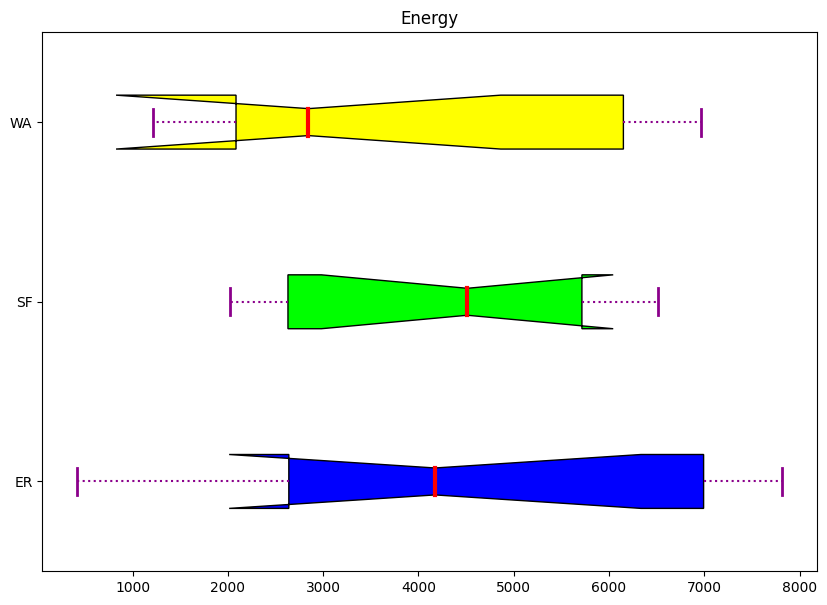

In [44]:
gr.box_plot([er_energy, sf_energy, wa_energy], ['ER', 'SF', 'WA'], 'Energy')

# compare ER, SF, Watts-Strogatz Laplacian Energy Connectivity

In [45]:
number_of_simulation = 10
sf_laplacian_energy = []
er_laplacian_energy = []
wa_laplacian_energy = []

for i in range(number_of_simulation):
    sf_laplacian_energy.append(gr.laplacian_energy(sf_graphs[i]))
    er_laplacian_energy.append(gr.laplacian_energy(er_graphs[i]))
    wa_laplacian_energy.append(gr.laplacian_energy(wa_graphs[i]))

print(f"er laplacian energy {np.mean(er_laplacian_energy)}")
print(f"sf laplacian energy {np.mean(sf_laplacian_energy)}")
print(f"watts laplacian strogatz energy {np.mean(wa_laplacian_energy)}")

er laplacian energy 6140.13587398371
sf laplacian energy 21753.83756424838
watts laplacian strogatz energy 4527.216742412269


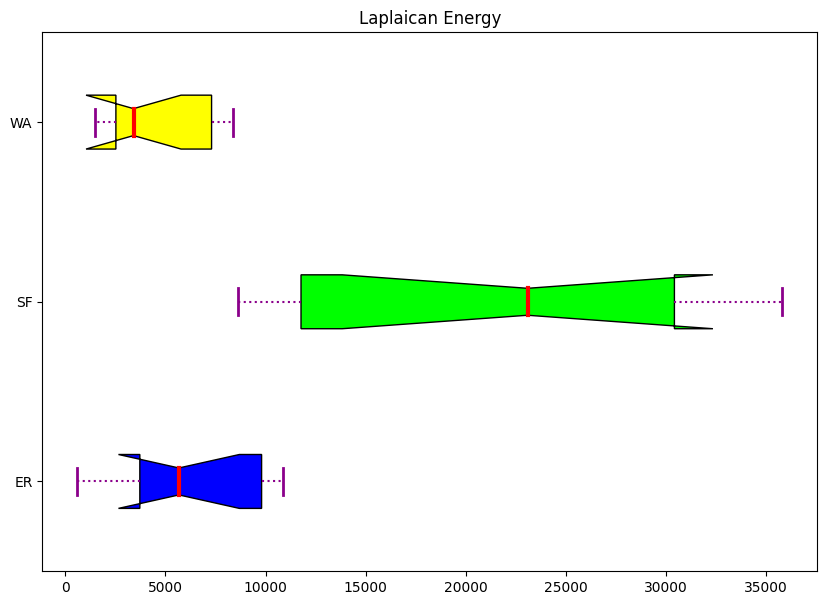

In [46]:
gr.box_plot([er_laplacian_energy, sf_laplacian_energy, wa_laplacian_energy], ['ER', 'SF', 'WA'], 'Laplaican Energy')

mean is 107.38772403226999
standard deviation is 10.301919609549044
CI is (101.002528105597, 113.77291995894298)


(107.38772403226999,
 10.301919609549044,
 6.3851959266729885,
 (101.002528105597, 113.77291995894298))

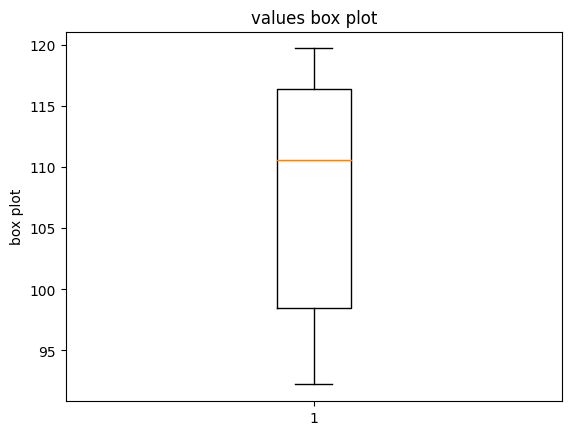

In [47]:
gr.calculate_statistics_parameters(sf_natural_connectivity)

mean is 78.72580962962
standard deviation is 36.228873447432846
CI is (56.270921227066694, 101.18069803217331)


(78.72580962962,
 36.228873447432846,
 22.454888402553312,
 (56.270921227066694, 101.18069803217331))

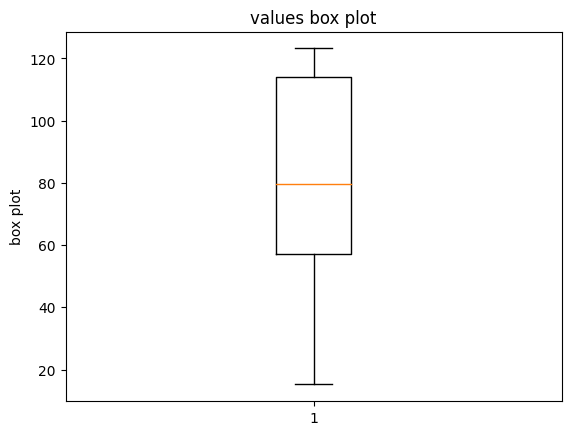

In [48]:
gr.calculate_statistics_parameters(er_natural_connectivity)

mean is 78.21330351897
standard deviation is 0.5695829072185066
CI is (77.86027237556027, 78.56633466237972)


(78.21330351897,
 0.5695829072185066,
 0.353031143409725,
 (77.86027237556027, 78.56633466237972))

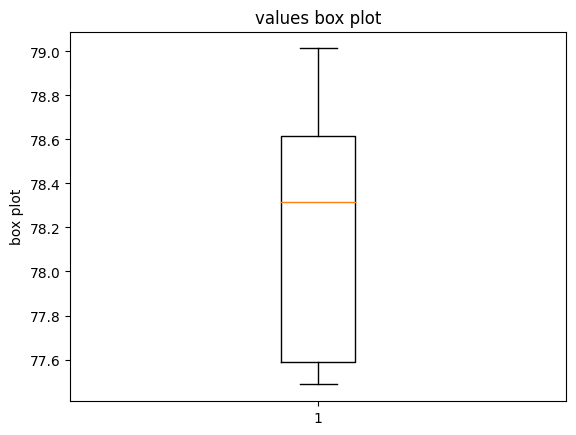

In [49]:
gr.calculate_statistics_parameters(wa_natural_connectivity)

# Conclusion

In [50]:
data = {
    "Algebratic Connectivity": [np.mean(er_algebraic_connectivity), np.mean(sf_algebraic_connectivity), np.mean(wa_algebraic_connectivity)],
    "Natural Connectivity": [np.mean(er_natural_connectivity), np.mean(sf_natural_connectivity), np.mean(wa_natural_connectivity)],
    "Spectral Gap": [np.mean(er_spectral_gap), np.mean(sf_spectral_gap), np.mean(wa_spectral_gap)],
    "Energy": [np.mean(er_energy), np.mean(sf_energy), np.mean(wa_energy)],
    "Laplacian Energy": [np.mean(er_laplacian_energy), np.mean(sf_laplacian_energy), np.mean(wa_laplacian_energy)] 
}

df = pd.DataFrame(data, index = ["ER", "SF", "WA"])

df

,Algebratic Connectivity,Natural Connectivity,Spectral Gap,Energy,Laplacian Energy
ER,57.365736,78.725810,68.777731,4420.097945,6140.135874
SF,43.351501,107.387724,96.827766,4260.834860,21753.837564
WA,50.267448,78.213304,51.256310,3772.643000,4527.216742


# Export Excel

In [51]:
df.to_excel('statistics.xlsx')